In [1]:
#Data Preprocessing
#Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import pickle

In [2]:
#reading the dataset
train_df = pd.read_csv('C:/Users/Ganta Pujitha/Desktop/train.csv')
test_df = pd.read_csv('C:/Users/Ganta Pujitha/Desktop/test.csv')
cols_target=['insult','toxic','severe-toxic','identify_hate','threat','obscene']


In [3]:
#text procesing
print(test_df.isnull().any())

id              False
comment_text    False
insult          False
toxic           False
severe-toxic    False
threat          False
obscene         False
dtype: bool


In [4]:
print(train_df.isnull().any())

id               False
comment_text     False
toxic            False
severe-toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool


In [5]:
print(train_df.columns)
cols_target = [col for col in cols_target if col in train_df.columns]

Index(['id', 'comment_text', 'toxic', 'severe-toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [6]:
print(repr(train_df.columns))



Index(['id', 'comment_text', 'toxic', 'severe-toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [7]:
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe-toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


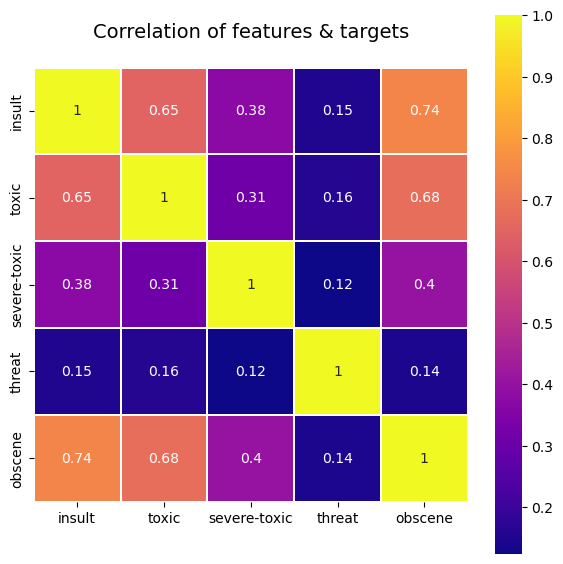

In [8]:
data = train_df[cols_target]

colormap = plt.cm.plasma
plt.figure(figsize=(7, 7))
plt.title('Correlation of features & targets', y=1.05, size=14)
sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [9]:
def clean_text(text):
    text=text.lower() 
    text = re.sub (r"what's", "what is ", text)
    text = re.sub (r"\'s"," ", text)
    text= re.sub(r"\'ve", " have ", text)
    text= re.sub (r"can't", "cannot ", text) 
    text= re.sub(r"n't", " not " ,text)
    text = re.sub(r"i'm", " i am ", text)
    text= re.sub (r"\'re", " are ", text)
    text=re.sub (r"\'d", " would ", text)
    text = re.sub (r"\'ll", " will ", text)
    text = re.sub (r"\'scuse", " excuse ", text)
    text = re.sub('\W',' ',text)
    text = re.sub('\s+', ' ', text)
    text=text.strip(' ')
    return text


train_df['comment_text']=train_df['comment_text'].map(lambda com : clean_text(com)) 
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))

In [10]:

#test_text_cleaned = test_text.map(clean_text)
#test_features = loaded.transform(test_text_cleaned)


#print("Number of features in test_features:", test_features.shape[1])
#print("Number of features in train_features:", train_features.shape[1])


In [11]:
#vectorizing the data
train_text = train_df['comment_text']
test_text = test_df['comment_text']
all_text = pd.concat([train_text, test_text])
from sklearn.feature_extraction.text import CountVectorizer 
word_vect = CountVectorizer(

                            strip_accents='unicode', 
                            analyzer='word', 
                            token_pattern=r' \w{1,}',
                            stop_words="english",
                            ngram_range=(1, 1)
                            )

word_vect.fit(all_text)

CountVectorizer(stop_words='english', strip_accents='unicode',
                token_pattern=' \\w{1,}')

In [12]:
train_features = word_vect.transform(train_text) 
test_features = word_vect.transform(test_text)

In [13]:
pickle.dump(word_vect.vocabulary_,open('word_feats.pkl','wb'))

In [14]:
#model BUilding
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
Logreg=LogisticRegression(C=12.0)

In [15]:
cols_target = ['insult', 'toxic', 'severe-toxic', 'identity_hate', 'threat', 'obscene']
submission_binary=pd.read_csv('C:/Users/Ganta Pujitha/Desktop/test.csv')
submission_data = {'id': test_df['id']}
mapper={}
for label in cols_target:
    mapper[label]=Logreg
    filename=str(label+'_model.sav')
    print(filename)
    print('...Processing {}'.format(label))
    y=train_df[label]
    mapper[label].fit(train_features,y)
    pickle.dump(mapper[label],open(filename,'wb'))
    y_pred_x=mapper[label].predict(train_features)
    print('Training accuracy is {}'.format(accuracy_score(y,y_pred_x)))
    test_y_prob=mapper[label].predict_proba(test_features)[:,1]
    submission_binary[label]=test_y_prob

insult_model.sav
...Processing insult


C:\Users\Ganta Pujitha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9735540919089308
toxic_model.sav
...Processing toxic


C:\Users\Ganta Pujitha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9693553339892587
severe-toxic_model.sav
...Processing severe-toxic


C:\Users\Ganta Pujitha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9919283579096453
identity_hate_model.sav
...Processing identity_hate


C:\Users\Ganta Pujitha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9931754516798165
threat_model.sav
...Processing threat


C:\Users\Ganta Pujitha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9984646332980304
obscene_model.sav
...Processing obscene
Training accuracy is 0.9806794467666431


C:\Users\Ganta Pujitha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
submission_binary.to_csv('submission_binary.csv',index=False)


In [17]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [18]:
loaded=CountVectorizer(decode_error='replace',vocabulary=pickle.load(open('word_feats.pkl','rb')))


In [19]:
from flask import Flask
app = Flask(__name__)
def clean_text(text):
    text=text.lower() 
    text = re.sub (r"what's", "what is ", text)
    text = re.sub (r"\'s"," ", text)
    text= re.sub(r"\'ve", " have ", text)
    text= re.sub (r"can't", "cannot ", text) 
    text= re.sub(r"n't", " not " ,text)
    text = re.sub(r"i'm", " i am ", text)
    text= re.sub (r"\'re", " are ", text)
    text=re.sub (r"\'d", " would ", text)
    text = re.sub (r"\'ll", " will ", text)
    text = re.sub (r"\'scuse", " excuse ", text)
    text = re.sub('\W',' ',text)
    text = re.sub('\s+', ' ', text)
    text=text.strip(' ')
    return text

In [20]:
from flask import Flask, render_template, url_for, request,redirect
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer

app = Flask(__name__)
loaded = CountVectorizer(decode_error='replace', vocabulary=pickle.load(open('word_feats.pkl','rb')))
cols_target = ['obscene', 'insult', 'toxic', 'severe-toxic', 'identity_hate', 'threat']
user_df = pd.DataFrame(columns=['comment_text'])  # Initialize an empty DataFrame
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", " i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

@app.route('/')
def landingpage():
    img_url = url_for('static', filename='hello.png')
    print(img_url)
    flag = 0
    return render_template('toxic.html', flag=flag)

@app.route('/predict', methods=['GET', 'POST'])
def predict():
    if request.method == 'GET':
        img_url = url_for('static', filename='hello.png')
        return render_template('toxic.html', url=img_url)
    
    if request.method == 'POST':
        comment = request.form['comment']
        new_row = {'comment_text': comment}
        global user_df  # Declare user_df as a global variable
        if 'user_df' not in globals():
            user_df = pd.DataFrame(columns=['comment_text'])
        user_df = pd.concat([user_df, pd.DataFrame([new_row])], ignore_index=True)
        user_df['comment_text'] = user_df['comment_text'].map(lambda com: clean_text(com))
        user_text = user_df['comment_text']
        user_features = loaded.transform(user_text)
        
        lst = []
        mapper = {}
        for label in cols_target:
            filename = str(label + '_model.sav')
            model = pickle.load(open(filename, 'rb'))
            print('...Processing {}'.format(label))
            user_y_prob = model.predict_proba(user_features)[:, 1]
            print(label, ":", user_y_prob[-1])
            lst.append([label, user_y_prob[-1]])
        
        print(lst)
        final = []
        flag = 0
        for i in lst:
            if i[1] > 0.5:
                final.append(i[0])
                flag = 2
        if not len(final):
            text = "Yayyy!! The comment is clean"
            img_url = url_for('static', filename='happy.png')
            flag = 1
            print(img_url)
        else:
            text = "The comment is "
            for i in final:
                text = text + i + " "
            img_url = url_for('static', filename='toxic.png')
        print(text)
        return render_template('toxic.html', ypred=text, url=img_url, flag=flag)





if __name__ == '__main__':
    app.run(host='localhost', debug=True, threaded=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://localhost:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Ganta Pujitha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
